# Predictive analysis using Wisconsin breast cancer data set

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from scipy.stats import randint as sp_randint
from sklearn import preprocessing

%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data.csv",header = 0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Prepare Data

In [3]:
# Remove unnecessary columns
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [4]:
# Encode diagnosis as numerical values(B=0, M=1)
le = preprocessing.LabelEncoder()
le.fit(['M', 'B'])

df['diagnosis'] = le.transform(df['diagnosis'])

In [5]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Visualize Data

One of the main goals of visualizing the data here is to observe which features are most helpful in predicting malignant or benign cancer. The other is to see general trends that may aid us in model selection and hyper parameter selection.

## Principal Component Analyis

The purpose for doing principal component analysis on the labeled data here is to observe the variance explained by each of the components and the associated weights assigned to each feature. The resulting output will aid in deciding on which features to drop.

In [6]:
from sklearn.decomposition import PCA

# observables = df.loc[:,observe]
observables = df.iloc[:,1:]
pca = PCA(n_components=3)
pca.fit(observables)

# Dimension indexing
dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

# Individual PCA Components
components = pd.DataFrame(np.round(pca.components_, 4), columns = observables.keys())
components.index = dimensions

# Explained variance in PCA
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
variance_ratios.index = dimensions

print(pd.concat([variance_ratios, components], axis = 1))

             Explained Variance  radius_mean  texture_mean  perimeter_mean  \
Dimension 1              0.9820       0.0051        0.0022          0.0351   
Dimension 2              0.0162       0.0093       -0.0029          0.0627   
Dimension 3              0.0016      -0.0123       -0.0064         -0.0717   

             area_mean  smoothness_mean  compactness_mean  concavity_mean  \
Dimension 1     0.5168           0.0000            0.0000          0.0001   
Dimension 2     0.8518          -0.0000           -0.0000          0.0001   
Dimension 3    -0.0279           0.0001            0.0001          0.0003   

             concave points_mean  symmetry_mean           ...             \
Dimension 1                  0.0         0.0000           ...              
Dimension 2                  0.0        -0.0000           ...              
Dimension 3                  0.0         0.0001           ...              

             radius_worst  texture_worst  perimeter_worst  area_worst  \


### Observations

It can be observed that **98.20%** of the variance is explained in dimension 1. This means that nearly all of the variance in the data can be described by one dimension. The remaining two dimensions describe a much smaller ammount of variance. 

In dimension 1, most of the feature weight is associated with the **area_mean** and **area_worst** dimension. This was a surprise. My assumption was that the mean values would describe most of the variance in the data. Due to this observation, in the next step, I will visualize how well each of the **mean** features as well as **area_worst** and **perimeter_worst** explain the resulting diagnosis.

While I will not be using PCA in the actual machine learning phase, this describes the data well and helps understand which features should be further investigated for their importance in the final prediction.

## Feature Selection
Along with my initial hypothesis that the *mean value* features were important in predicting cancer type, **area_worst** and **perimeter_worst** will also be investigated due to their weighted importance in the previous PCA observation step.

In [7]:
# Separate out malignant and benign data for graphing
malignant = df[df['diagnosis'] ==1]
benign = df[df['diagnosis'] ==0]

In [8]:
# Column names to observe in following graphs - mean values only
observe = list(df.columns[1:11]) + ['area_worst'] + ['perimeter_worst']
observables = df.loc[:,observe]

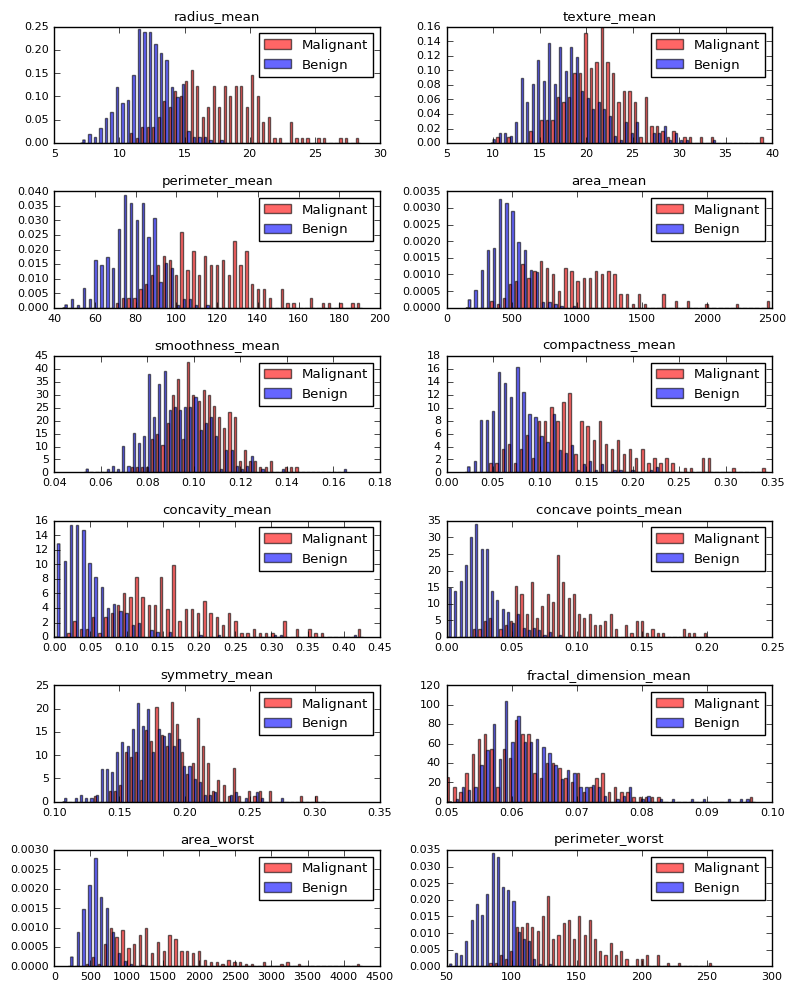

In [9]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,axis in enumerate(axes):
    axis.figure
    
    binwidth= (max(df[observe[idx]]) - min(df[observe[idx]]))/50
    bins = np.arange(min(df[observe[idx]]), max(df[observe[idx]]) + binwidth, binwidth)
    axis.hist([malignant[observe[idx]],benign[observe[idx]]], bins=bins, alpha=0.6, normed=True, label=['Malignant','Benign'], color=['red','blue'])
    axis.legend(loc='upper right')
    axis.set_title(observe[idx])
plt.tight_layout()

### Observations
From the graphs, we can see that **radius_mean, perimeter_mean, area_mean, concavity_mean** and **concave_points_mean** are useful in predicting cancer type due to the distict grouping between malignant and benign cancer types in these features. We can also see that **area_worst** and **perimeter_worst** are also quite useful.



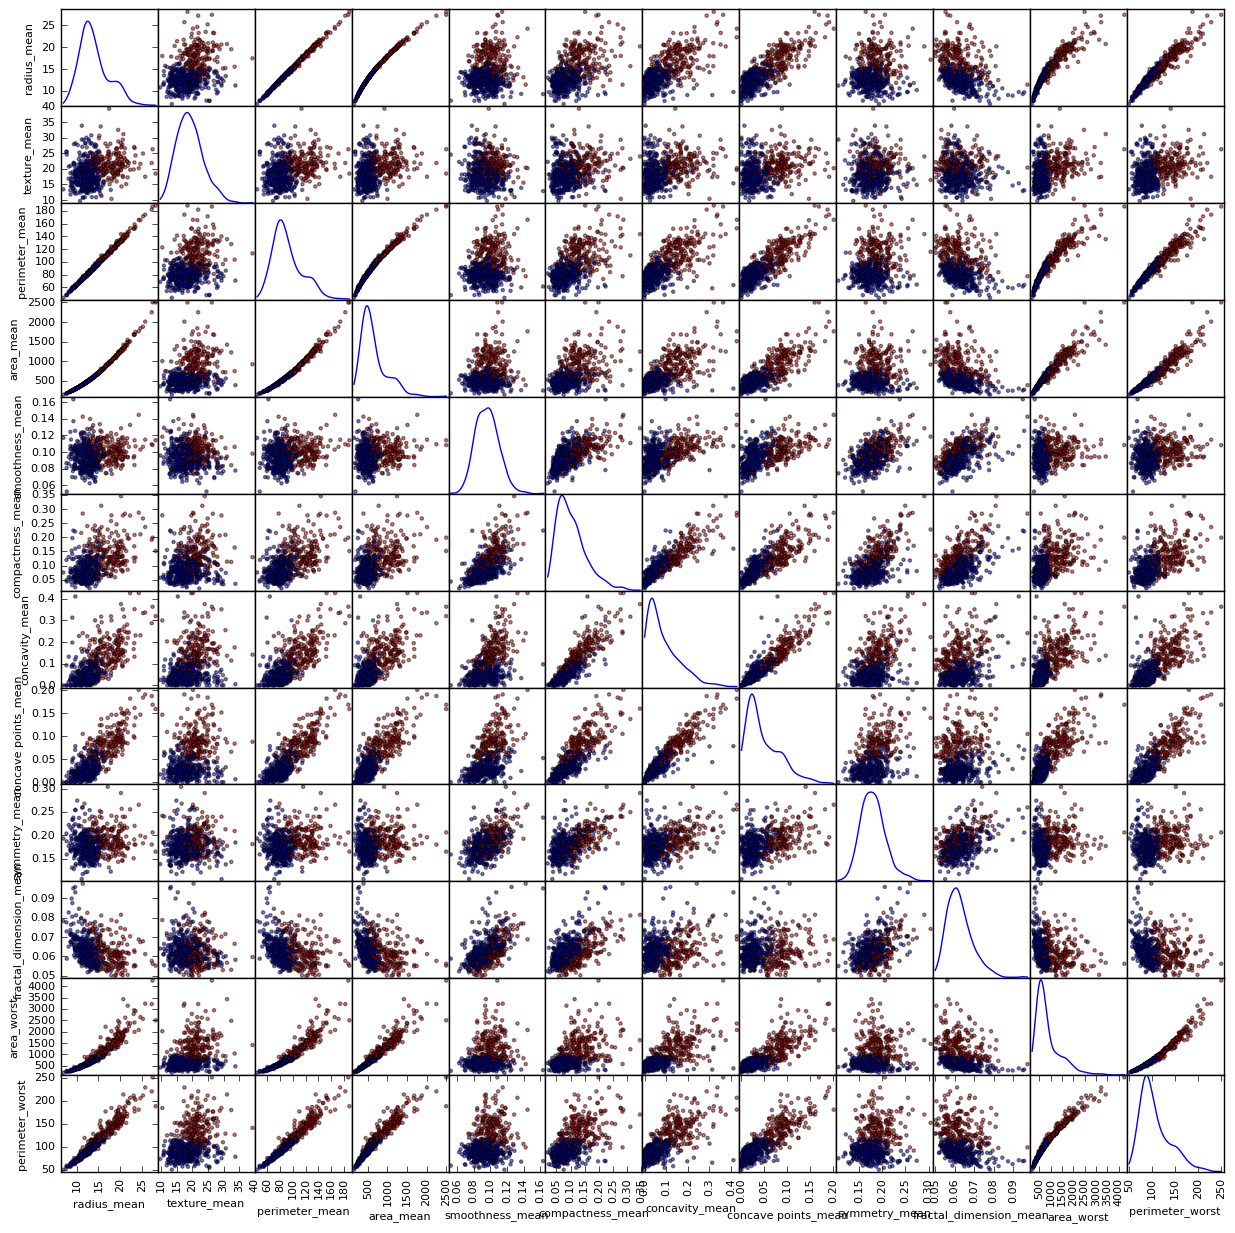

In [10]:
color_wheel = {0: "blue", 1: "red"}
colors = df["diagnosis"].map(lambda x: color_wheel.get(x))
pd.scatter_matrix(observables, c=colors, alpha = 0.5, figsize = (15, 15), diagonal = 'kde');

### Observations

The scatter matrix clarifies a few more points. The **perimeter_mean, area_mean** and **radius mean** have a strong, positive, linear correlation. Most other data also has a more rough linear correlation to other features with the exception of **fractal_dimension_mean, symmetry_mean** and **smoothness_mean**.

Within these three features we can see quite a bit of itermixing between malignant and benign cancer in the scatter matrix. This suggests that our assumption above, that they do not aid in predicting cancer type, is likely correct. There is less correlation and separability between the two diagnoses.

Due to the lack of clear separability and lack of variance explained I feel comfortable dropping them.

#### Trimming Data
From observing the graphs and PCA data above: fractal_dimension_mean, smoothness_mean and symmetry_mean are not very useful in predicting the type of cancer. To aid in the learning process and remove noise, these columns will be dropped.

In [11]:
# Drop columns that do not aid in predicting type of cancer
observables.drop(['fractal_dimension_mean', 'smoothness_mean', 'symmetry_mean'],axis=1,inplace=True)
# observables.drop(['fractal_dimension_mean', 'smoothness_mean', 'symmetry_mean', 'texture_mean'],axis=1,inplace=True)

# Classification

Here a comparison will be made between the different types of learning algorithms. At the end a breakdown of the data and explanation of the algorithm's performance will be made.

In [12]:
# Split data appropriately
X = observables
y = df['diagnosis']

### Naive Bayes

In [13]:
gnb = GaussianNB()
gnb_scores = cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
print(gnb_scores.mean())


0.922978783165


Gaussian Naive Bayes had an accuracy score of **0.92**. While this is not ideal, it is not a terrible score to attain using an algorithm as simple as Naive Bayes. NB performed well because, as seen above, much of the data is linearly separable. 

### KNN

In [14]:
# Decide what k should be for KNN
knn = KNeighborsClassifier()

k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options, 'algorithm': algorithm}

In [15]:
rand_knn = RandomizedSearchCV(knn, param_grid, cv=10, scoring="accuracy", n_iter=100, random_state=42)
rand_knn.fit(X,y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

It looks as though any value for K past 20 would work well but the simpler the better.

In [16]:
print(rand_knn.best_score_)
print(rand_knn.best_params_)
print(rand_knn.best_estimator_)

0.931458699473
{'weights': 'uniform', 'n_neighbors': 14, 'leaf_size': 22, 'algorithm': 'ball_tree'}
KNeighborsClassifier(algorithm='ball_tree', leaf_size=22, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')


#### KNN Findings

Utilizing Randomized hyper parameter search along with cross validation resulted in a KNN model with an accuracy score of **0.93**. The model that was chosen by *RandomizedSearchCV* is as follows: {'weights': 'uniform', 'n_neighbors': 14, 'leaf_size': 22, 'algorithm': 'ball_tree'}.

I do not believe KNN is optimal for this problem so a more involved comparison of results will be made after several more tests.

### Decision Tree Classifier

In [17]:
dt_clf = DecisionTreeClassifier(random_state=42)

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': sp_randint(2, 11), 
              'min_samples_leaf': sp_randint(1, 11)}


In [18]:
rand_dt = RandomizedSearchCV(dt_clf, param_grid, cv=10, scoring="accuracy", n_iter=100, random_state=42)
rand_dt.fit(X,y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
          fit_params={}, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11430d080>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10fb67eb8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

In [19]:
print(rand_dt.best_score_)
print(rand_dt.best_params_)
print(rand_dt.best_estimator_)

0.945518453427
{'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')


#### Decision Tree Findings

Utilizing Randomized hyper parameter search along with cross validation resulted in a Decision Tree Classificaiton model with an accuracy score of **0.95**. The model that was chosen by *RandomizedSearchCV* is as follows: {'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3}.

### Support Vector Machine Classifier

In [20]:
sv_clf = SVC(random_state=42)

param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]


In [21]:
grid_sv = GridSearchCV(sv_clf, param_grid, cv=10, scoring="accuracy")
grid_sv.fit(X,y)


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [22]:
print(grid_sv.best_score_)
print(grid_sv.best_params_)
print(grid_sv.best_estimator_)

0.96309314587
{'C': 100, 'kernel': 'linear'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)


#### SVM Findings

Utilizing Randomized hyper parameter search along with cross validation resulted in a SVM model with an accuracy score of **0.96** which is quite good. The model that was chosen by *RandomizedSearchCV* is as follows: {'C': 100, 'kernel': 'linear'}.

I found it interesting how the linear kernel performed significantly better than the RBF. It is worth taking more time to look into the exactly how RBF and linear kernels behave. An interesting side note was the execution time on linear kernels which was much longer than RBF.

### Random Forest Classification


In [23]:
rf_clf = RandomForestClassifier(random_state=42)

param_grid = {"max_depth": [3, None],
              "max_features":  sp_randint(1, 8),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [24]:
rand_rf = RandomizedSearchCV(rf_clf, param_distributions=param_grid, n_iter=100, random_state=42)
rand_rf.fit(X,y)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x114720400>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x113fceb38>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1147ef208>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=Non

In [25]:
print(rand_rf.best_score_)
print(rand_rf.best_params_)
print(rand_rf.best_estimator_)

0.954305799649
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 4}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)


#### Random Forest Findings

Here we continue to see relatively accurate predictions. The classification accuracy is **0.95** which is pretty good given the size of the dataset.

### AdaBoost Classifier

In [35]:
# Using decision stumps due to size of sample.
# Attempting to prevent over-fitting
stump_clf =  DecisionTreeClassifier(random_state=42, max_depth=1)

param_grid = {
              "base_estimator__max_features": ['auto', 'sqrt', 'log2'],
              "n_estimators": list(range(1,500)),
              "learning_rate": np.linspace(0.01, 1, num=20),
             }


In [36]:
ada_clf = AdaBoostClassifier(base_estimator = stump_clf)

rand_ada = RandomizedSearchCV(ada_clf, param_grid, scoring = 'accuracy', n_iter=100, random_state=42)
rand_ada.fit(X,y)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
          fit_params={}, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'base_estimator__max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 5...316,
        0.63526,  0.68737,  0.73947,  0.79158,  0.84368,  0.89579,
        0.94789,  1.     ])},
          pre_dispat

In [37]:
print(rand_ada.best_score_)
print(rand_ada.best_params_)
print(rand_ada.best_estimator_)

0.964850615114
{'n_estimators': 339, 'learning_rate': 0.84368421052631581, 'base_estimator__max_features': 'auto'}
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'),
          learning_rate=0.84368421052631581, n_estimators=339,
          random_state=None)


#### AdaBoost Findings

As I expected, AdaBoost performed quite well. It has an accuracy of **0.965**. I decided to use a decision stump as the base estimator for a few reasons. Due to the size of the dataset I wanted to reduce the possibility of overfitting by using a very simple model. I could have gotten better results by swapping out a randomforest for decision stump but I feel that there is a lack of generalization in that case. I'm much more confident in the generalization of this model.

In [ ]:
pd.DataFrame.from_dict(grid_search_ABC.cv_results_)